## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [3]:
!pip install matplotlib

     |████████████████████████████████| 9.4 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 29.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 26.6 MB/s eta 0:00:01
     |████████████████████████████████| 965 kB 20.2 MB/s eta 0:00:01
     |████████████████████████████████| 295 kB 14.7 MB/s eta 0:00:01


In [5]:
!pip install sklearn

     |████████████████████████████████| 31.2 MB 6.1 MB/s eta 0:00:01     |█████████████████████████▍      | 24.8 MB 6.1 MB/s eta 0:00:02
     |████████████████████████████████| 297 kB 17.8 MB/s eta 0:00:01
     |████████████████████████████████| 33.8 MB 369 kB/s  eta 0:00:01    |██▊                             | 2.9 MB 26.0 MB/s eta 0:00:02     |█████████▎                      | 9.8 MB 26.0 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=aacd1af09396cb880f6895d52d78dbb525bd764ce4f3b238be630b7cb7c5b551
  Stored in directory: /home/lmendes/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [2]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [3]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [4]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [6]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [7]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [8]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [9]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [10]:
# save the data set

data.to_csv('titanic.csv', index=False)

In [14]:
print(data.pclass.unique())
print(data.survived.unique())
print(data.sibsp.unique())
print(data.parch.unique())

[1 2 3]
[1 0]
[0 1 2 3 4 5 8]
[0 2 1 4 3 5 6 9]


## Data Exploration

### Find numerical and categorical variables

In [11]:
target = 'survived'

In [22]:
vars_cat = [var for var in data.columns if data[var].dtype == 'O']
vars_cat.extend(['pclass', 'survived', 'sibsp', 'parch'])
vars_cat
data[vars_cat] = np.asarray(data[vars_cat], dtype='O')

vars_num = [var for var in data.columns if var not in vars_cat]

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 2
Number of categorical variables: 12


### Find missing values in variables

In [25]:
# first in numerical variables
vars_num_missing_values = [var for var in vars_num if data[var].isnull().sum() > 0]
print(vars_num_missing_values)
sorted_num_missing = data[vars_num_missing_values].isnull().mean().sort_values(ascending=False)
print(sorted_num_missing)

['age', 'fare']
age     0.200917
fare    0.000764
dtype: float64


In [26]:
# now in categorical variables
vars_cat_missing_values = [var for var in vars_cat if data[var].isnull().sum() > 0]
print(vars_cat_missing_values)
sorted_cat_missing = data[vars_cat_missing_values].isnull().mean().sort_values(ascending=False)
print(sorted_cat_missing)


['cabin', 'embarked']
cabin       0.774637
embarked    0.001528
dtype: float64


### Determine cardinality of categorical variables

In [28]:
for var in vars_cat:
    print('Cardinality of', var, ' :', len(data[var].unique()))

Cardinality of pclass  : 3
Cardinality of survived  : 2
Cardinality of sex  : 2
Cardinality of sibsp  : 7
Cardinality of parch  : 8
Cardinality of cabin  : 182
Cardinality of embarked  : 4
Cardinality of title  : 5
Cardinality of pclass  : 3
Cardinality of survived  : 2
Cardinality of sibsp  : 7
Cardinality of parch  : 8


### Determine the distribution of numerical variables

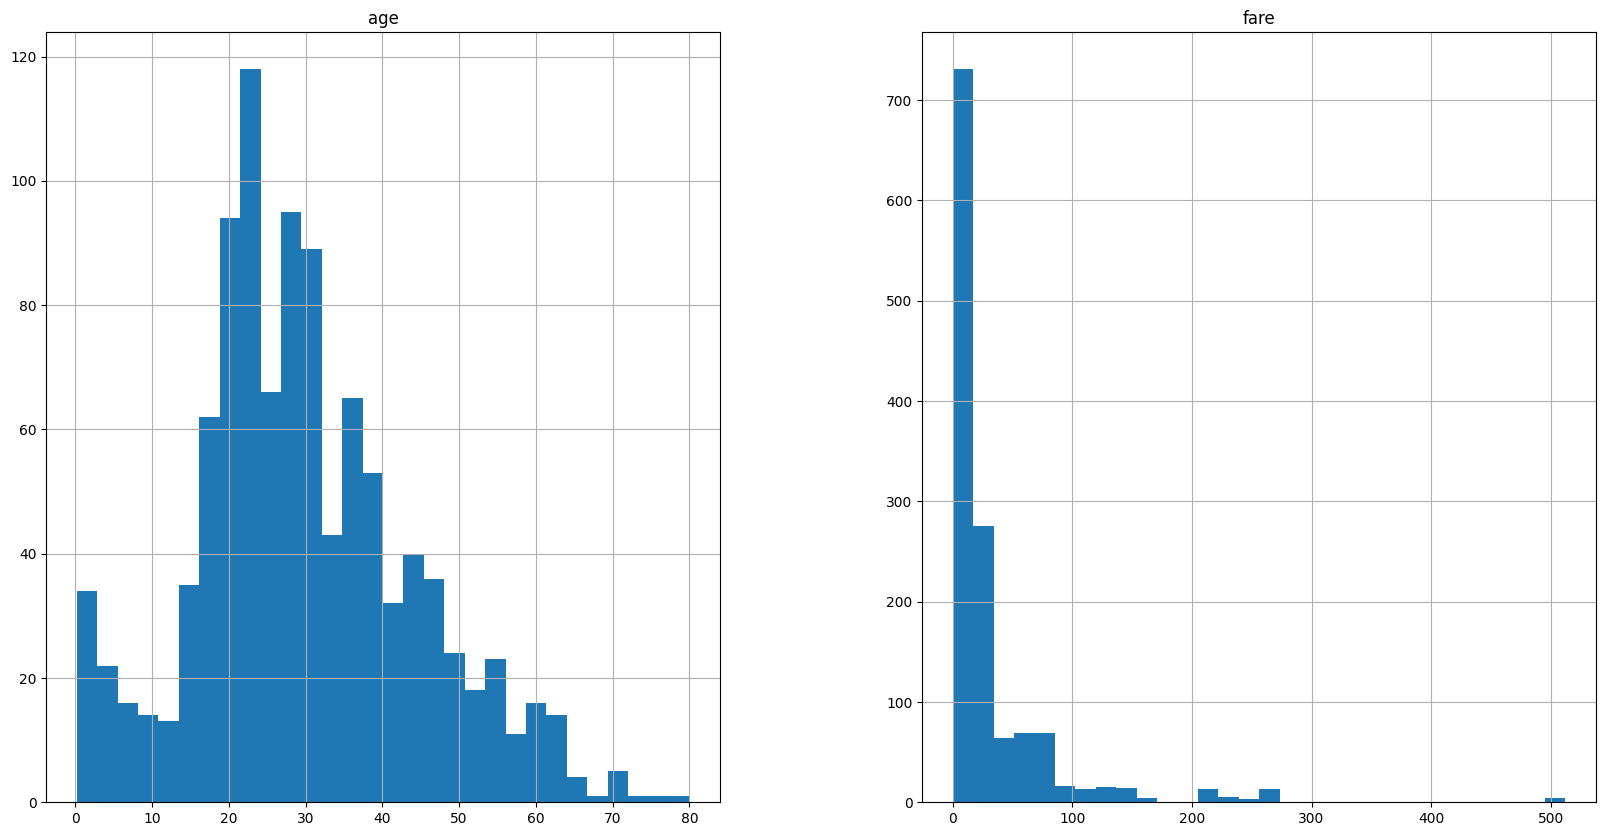

In [32]:
data[vars_num].hist(bins=30, figsize=(20,10))
plt.show()

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [61]:
data['cabin']

0        B5
1       C22
2       C22
3       C22
4       C22
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: cabin, Length: 1309, dtype: object

In [60]:
[val[0] if str(val)[0] != 'n' else val for val in data['cabin']]

['B',
 'C',
 'C',
 'C',
 'C',
 'E',
 'D',
 'A',
 'C',
 nan,
 'C',
 'C',
 'B',
 nan,
 'A',
 nan,
 'B',
 'B',
 'D',
 'C',
 'D',
 'D',
 'C',
 nan,
 'C',
 nan,
 'B',
 'B',
 'C',
 'C',
 'T',
 'A',
 'C',
 'C',
 'D',
 nan,
 'E',
 nan,
 'A',
 'B',
 nan,
 'B',
 'C',
 'D',
 'E',
 'B',
 nan,
 'E',
 nan,
 'B',
 'B',
 'B',
 nan,
 nan,
 'B',
 'B',
 'B',
 'B',
 nan,
 nan,
 'C',
 'C',
 'E',
 'E',
 'E',
 'E',
 'B',
 'B',
 'A',
 'E',
 nan,
 'C',
 'C',
 nan,
 'A',
 'E',
 'E',
 'E',
 'E',
 'C',
 nan,
 'B',
 'B',
 'B',
 'C',
 'C',
 'E',
 nan,
 nan,
 'B',
 'B',
 'B',
 'B',
 'A',
 'A',
 'A',
 'C',
 'B',
 'C',
 'A',
 'A',
 'A',
 'C',
 'C',
 'D',
 'A',
 'C',
 nan,
 nan,
 'E',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'C',
 'E',
 'D',
 nan,
 'D',
 nan,
 'B',
 'B',
 'B',
 'B',
 'C',
 'C',
 'E',
 'C',
 nan,
 nan,
 'B',
 'C',
 'C',
 'A',
 'C',
 'B',
 'C',
 'C',
 'D',
 'D',
 'B',
 'E',
 'E',
 'D',
 'D',
 nan,
 'C',
 'C',
 'B',
 'D',
 'D',
 'C',
 'B',
 'B',
 'B',
 'E',
 'C',
 'B',
 'B',
 'D',
 nan,
 nan,
 nan,
 'C',
 nan

In [65]:
data['cabin'] = [val[0] if str(val)[0] != 'n' else val for val in data['cabin']]
data['cabin'].unique()

array(['B', 'C', 'E', 'D', 'A', nan, 'T', 'F', 'G'], dtype=object)

### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [66]:
data['age'].isnull().sum()

263

In [69]:
data['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [71]:
age_median = data['age'].median()
data['age'] = data['age'].fillna(age_median)
data['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    28.0000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [74]:
data['fare'].isnull().sum()

0

In [73]:
fare_median = data['fare'].median()
data['fare'] = data['fare'].fillna(fare_median)

### Replace Missing data in categorical variables with the string **Missing**

In [84]:
sum_na = 0
vars_cat_na = []
for var in vars_cat:
    this_sum = data[var].isnull().sum()
    if this_sum > 0:
        sum_na += this_sum
        print(var, 'nas:', this_sum)
        vars_cat_na.append(var)

cabin nas: 1014
embarked nas: 2


In [85]:
data['cabin'] = data['cabin'].fillna('missing')
cabin_missing_bool_array = data['cabin'] == 'missing'
cabin_missing_bool_array.sum()

1014

In [86]:
data['embarked'] = data['embarked'].fillna('missing')
embarked_missing_bool_array = data['embarked'] == 'missing'
embarked_missing_bool_array.sum()

2

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [87]:
def analyze_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['survived'].count()/len(df)
    return tmp[tmp < rare_perc]

In [91]:
for var in vars_cat:
    print(analyze_rare_labels(data, var, 0.05))

Series([], Name: survived, dtype: float64)
Series([], Name: survived, dtype: float64)
Series([], Name: survived, dtype: float64)
sibsp
2    0.032086
3    0.015279
4    0.016807
5    0.004584
8    0.006875
Name: survived, dtype: float64
parch
3    0.006112
4    0.004584
5    0.004584
6    0.001528
9    0.001528
Name: survived, dtype: float64
cabin
A    0.016807
B    0.049656
D    0.035141
E    0.031322
F    0.016043
G    0.003820
T    0.000764
Name: survived, dtype: float64
embarked
missing    0.001528
Name: survived, dtype: float64
title
Master    0.046600
Other     0.023682
Name: survived, dtype: float64
Series([], Name: survived, dtype: float64)
Series([], Name: survived, dtype: float64)
sibsp
2    0.032086
3    0.015279
4    0.016807
5    0.004584
8    0.006875
Name: survived, dtype: float64
parch
3    0.006112
4    0.004584
5    0.004584
6    0.001528
9    0.001528
Name: survived, dtype: float64


In [95]:
vars_to_drop = [
    'sibsp',
    'parch',
    'cabin',
    'embarked',
    'title',
]
data = data.drop(labels=vars_to_drop, axis='columns')

In [97]:
print([var for var in data.columns if var in vars_cat])

['pclass', 'survived', 'sex']


### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [99]:
print(data)

     pclass survived     sex      age      fare
0         1        1  female  29.0000  211.3375
1         1        1    male   0.9167  151.5500
2         1        0  female   2.0000  151.5500
3         1        0    male  30.0000  151.5500
4         1        0  female  25.0000  151.5500
...     ...      ...     ...      ...       ...
1304      3        0  female  14.5000   14.4542
1305      3        0  female  28.0000   14.4542
1306      3        0    male  26.5000    7.2250
1307      3        0    male  27.0000    7.2250
1308      3        0    male  29.0000    7.8750

[1309 rows x 5 columns]


In [111]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['pclass', 'sex'])
print(one_hot_encoded_data)
one_hot_encoded_data = one_hot_encoded_data.drop(labels=['pclass_3', 'sex_male'], axis='columns')
print(one_hot_encoded_data)

     survived      age      fare  pclass_1  pclass_2  pclass_3  sex_female  \
0           1  29.0000  211.3375         1         0         0           1   
1           1   0.9167  151.5500         1         0         0           0   
2           0   2.0000  151.5500         1         0         0           1   
3           0  30.0000  151.5500         1         0         0           0   
4           0  25.0000  151.5500         1         0         0           1   
...       ...      ...       ...       ...       ...       ...         ...   
1304        0  14.5000   14.4542         0         0         1           1   
1305        0  28.0000   14.4542         0         0         1           1   
1306        0  26.5000    7.2250         0         0         1           0   
1307        0  27.0000    7.2250         0         0         1           0   
1308        0  29.0000    7.8750         0         0         1           0   

      sex_male  
0            0  
1            1  
2           

/home/lmendes/.local/lib/python3.8/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


### Scale the variables

- Use the standard scaler from Scikit-learn

In [136]:
y = one_hot_encoded_data['survived'].astype('int')
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [137]:
X = one_hot_encoded_data.drop(labels='survived', axis='columns')
X

,age,fare,pclass_1,pclass_2,sex_female
0,29.0000,211.3375,1,0,1
1,0.9167,151.5500,1,0,0
2,2.0000,151.5500,1,0,1
3,30.0000,151.5500,1,0,0
4,25.0000,151.5500,1,0,1
...,...,...,...,...,...
1304,14.5000,14.4542,0,0,1
1305,28.0000,14.4542,0,0,1
1306,26.5000,7.2250,0,0,0
1307,27.0000,7.2250,0,0,0


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [139]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(916, 5) (393, 5) (916,) (393,)


In [140]:
scaler = StandardScaler()
X_train[vars_num] = scaler.fit_transform(X_train[vars_num])
X_test[vars_num] = scaler.transform(X_test[vars_num])

print(X_train)
print(X_test)

           age      fare  pclass_1  pclass_2  sex_female
1214 -0.070918 -0.474090         0         0           0
677  -0.232596 -0.488615         0         0           0
534  -0.798468 -0.145646         0         1           1
1174 -0.070918  0.679371         0         0           1
864  -0.070918 -0.490903         0         0           1
...        ...       ...       ...       ...         ...
1095 -0.070918 -0.493665         0         0           1
1130 -0.879307 -0.490903         0         0           1
1294 -0.030498 -0.333193         0         0           0
860  -0.232596 -0.488062         0         0           1
1126 -0.070918 -0.488615         0         0           1

[916 rows x 5 columns]
           age      fare  pclass_1  pclass_2  sex_female
1148  0.494955 -0.503217         0         0           0
1049 -0.717630 -0.339981         0         0           0
982  -0.070918 -0.488615         0         0           0
808  -0.070918 -0.485694         0         0           0
1195 -0

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [146]:
#logreg_model = LogisticRegression(C=0.0005, random_state=0).fit(X_train, y_train)
logreg_model = LogisticRegression(C=2000, random_state=0).fit(X_train, y_train)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [147]:
y_pred = logreg_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [148]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8091603053435115

In [152]:
y_prob = logreg_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.8566805790363483

That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**